# Data Merging

In [ ]:
import pandas as pd
import glob

Load all tripdata files, as they come as one file per month:

In [23]:
csv_files = glob.glob('data/raw/2023*-capitalbikeshare-tripdata.csv')

In [43]:
df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

In [44]:
df.shape

(4259743, 13)

A bit more than 4.2 million trips.

In [45]:
df = df[
    df['start_station_name'].notna() &
    (df['start_station_name'].str.strip() != '') &
    df['end_station_name'].notna() &
    (df['end_station_name'].str.strip() != '')
]

In [47]:
df.shape

(3671251, 13)

Now load location data:

In [49]:
station_data = pd.read_csv("data/raw/Capital_Bikeshare_Locations.csv")

In [64]:
matched_df = df[df['start_station_name'].isin(station_data['NAME']) & df['end_station_name'].isin(station_data['NAME'])].copy()

In [65]:
matched_df.shape


(3456487, 13)

In [61]:
matched_df.to_csv("data/processed/matchable_trips.csv")

In [3]:
import pandas as pd
matched_df = pd.read_csv("data/processed/matchable_trips.csv")

In [4]:
matched_df.to_parquet("data/processed/matchable_trips.parquet", compression="brotli")

In [59]:
used_stations = pd.concat([
    matched_df['start_station_name'].dropna().str.strip(),
    matched_df['end_station_name'].dropna().str.strip()
]).unique()
unused_stations = station_data[~station_data['NAME'].isin(used_stations)]
unused_stations

,X,Y,NAME,STATION_TYPE,STATION_ID,STATION_STATUS,LAST_REPORTED,NUM_DOCKS_AVAILABLE,NUM_DOCKS_DISABLED,NUM_BIKES_AVAILABLE,...,EIGHTD_HAS_KEY_DISPENSER,CAPACITY,RENTAL_METHODS,REGION_ID,REGION_NAME,GIS_ID,LATITUDE,LONGITUDE,GIS_LAST_MOD_DTTM,OBJECTID
2,-8.571084e+06,4.705096e+06,Eastern Market Metro,classic,1996328198078007666,NaN,2025/02/26 19:46:20+00,25,0,6,...,NO,32,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.884181,-76.995358,2025/02/26 19:47:29+00,245787996
14,-8.605783e+06,4.698036e+06,GMU/Rappahannock River Ln,classic,1929488700232798842,NaN,2025/02/26 19:46:26+00,7,0,5,...,NO,12,"KEY,CREDITCARD",NaN,DCA-CABI,NaN,38.834800,-77.307057,2025/02/26 19:47:29+00,245788008
39,-8.575242e+06,4.715546e+06,Colorado Ave & Longfellow St NW,classic,082549b0-1f3f-11e7-bf6b-3863bb334450,NaN,2025/02/26 19:44:57+00,11,0,7,...,NO,19,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.957212,-77.032707,2025/02/26 19:47:29+00,245788033
56,-8.582497e+06,4.721584e+06,Medical Center Metro,classic,0826168f-1f3f-11e7-bf6b-3863bb334450,NaN,2025/02/26 19:46:23+00,14,0,5,...,NO,19,"KEY,CREDITCARD",44.0,DCA-CABI,NaN,38.999378,-77.097882,2025/02/26 19:47:29+00,245788050
57,-8.560218e+06,4.723153e+06,Motiva Greenbelt,classic,2044178809518389390,NaN,2025/02/26 19:46:23+00,3,0,7,...,NO,10,"KEY,CREDITCARD",133.0,DCA-CABI,NaN,39.010335,-76.897747,2025/02/26 19:47:29+00,245788051
73,-8.566872e+06,4.705048e+06,34th St & Minnesota Ave SE,classic,1936548863063266016,NaN,2025/02/26 19:44:34+00,3,0,9,...,NO,12,"KEY,CREDITCARD",NaN,DCA-CABI,NaN,38.883843,-76.957511,2025/02/26 19:47:29+00,245788067
78,-8.571061e+06,4.707729e+06,7th & K St NE,classic,3d88e01e-e071-4638-829c-543410cded50,NaN,2025/02/26 19:44:38+00,14,0,0,...,NO,15,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.902594,-76.995141,2025/02/26 19:47:29+00,245788072
93,-8.568372e+06,4.702833e+06,25th & S St SE,classic,1936549598369980886,NaN,2025/02/26 19:44:53+00,3,0,9,...,NO,12,"KEY,CREDITCARD",NaN,DCA-CABI,NaN,38.868356,-76.970997,2025/02/26 19:47:29+00,245788087
113,-8.588339e+06,4.688330e+06,Charles Arrington Dr & Manchester Lakes Dr,classic,1917259365558921792,NaN,2025/02/26 19:45:30+00,2,0,9,...,NO,12,"KEY,CREDITCARD",NaN,DCA-CABI,NaN,38.766844,-77.150359,2025/02/26 19:47:29+00,245788107
118,-8.575594e+06,4.707741e+06,16th & K St NW/BLM Plaza,classic,1923638474906011698,NaN,2025/02/26 19:45:17+00,22,0,15,...,NO,39,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.902677,-77.035866,2025/02/26 19:47:29+00,245788112


## Agreggating Trips

In [67]:

matched_df['started_at'] = pd.to_datetime(matched_df['started_at'])
matched_df['ended_at'] = pd.to_datetime(matched_df['ended_at'])

matched_df['start_hour'] = matched_df['started_at'].dt.floor('h')
matched_df['end_hour'] = matched_df['ended_at'].dt.floor('h')


In [69]:
departures = matched_df.groupby(['start_station_name', 'start_hour']).size().reset_index(name='departures')



In [71]:
departures.rename(columns={'start_station_name': 'station_name', 'start_hour': 'hour'}, inplace=True)


In [72]:
arrivals = matched_df.groupby(['end_station_name', 'end_hour']).size().reset_index(name='arrivals')
arrivals.rename(columns={'end_station_name': 'station_name', 'end_hour': 'hour'}, inplace=True)

station_hourly = pd.merge(departures, arrivals, on=['station_name', 'hour'], how='outer').fillna(0)

In [73]:
station_hourly

,station_name,hour,departures,arrivals
0,10th & E St NW,2023-01-01 03:00:00,1.0,0.0
1,10th & E St NW,2023-01-01 07:00:00,0.0,1.0
2,10th & E St NW,2023-01-01 10:00:00,1.0,5.0
3,10th & E St NW,2023-01-01 11:00:00,1.0,3.0
4,10th & E St NW,2023-01-01 12:00:00,3.0,0.0
...,...,...,...,...
1882450,Yuma St & Tenley Circle NW,2023-12-24 18:00:00,1.0,0.0
1882451,Yuma St & Tenley Circle NW,2023-12-25 18:00:00,0.0,1.0
1882452,Yuma St & Tenley Circle NW,2023-12-28 01:00:00,0.0,2.0
1882453,Yuma St & Tenley Circle NW,2023-12-28 19:00:00,1.0,0.0


In [ ]:
station_hourly.to_csv("data/processed/station_hourly_deltas.csv")

In [85]:
station_hourly.to_parquet('data/processed/station_hourly_deltas.parquet', compression='brotli')

# Some EDA

In [74]:
avg_departures_per_station = station_hourly.groupby('station_name')['departures'].mean().reset_index(name='avg_departures')

In [76]:
avg_arrivals_per_station = station_hourly.groupby('station_name')['arrivals'].mean().reset_index(name='avg_arrivals')

In [75]:
avg_departures_per_station

,station_name,avg_departures
0,10th & E St NW,2.208910
1,10th & G St NW,1.571339
2,10th & H St NE,1.556648
3,10th & K St NW,2.257291
4,10th & Monroe St NE,1.131914
...,...,...
733,Woodglen Dr & Executive Blvd,0.776048
734,Woodley Park Metro / Calvert St & Connecticut ...,1.816663
735,Woodmont Ave & Strathmore St,0.976864
736,Woody Ward Rec Center,0.716216


In [77]:
avg_arrivals_per_station

,station_name,avg_arrivals
0,10th & E St NW,2.364931
1,10th & G St NW,2.106695
2,10th & H St NE,1.595044
3,10th & K St NW,2.318304
4,10th & Monroe St NE,0.828036
...,...,...
733,Woodglen Dr & Executive Blvd,0.754491
734,Woodley Park Metro / Calvert St & Connecticut ...,1.666926
735,Woodmont Ave & Strathmore St,0.887318
736,Woody Ward Rec Center,0.797297


In [79]:
max_departures_per_station = station_hourly.groupby('station_name')['arrivals'].max().reset_index(name='max_arrivals')
print(max_departures_per_station)


                                          station_name  max_arrivals
0                                       10th & E St NW          16.0
1                                       10th & G St NW          18.0
2                                       10th & H St NE          14.0
3                                       10th & K St NW          16.0
4                                  10th & Monroe St NE          12.0
..                                                 ...           ...
733                       Woodglen Dr & Executive Blvd           5.0
734  Woodley Park Metro / Calvert St & Connecticut ...          12.0
735                       Woodmont Ave & Strathmore St           8.0
736                              Woody Ward Rec Center           3.0
737                         Yuma St & Tenley Circle NW           3.0

[738 rows x 2 columns]


In [80]:
total_departures_per_hour = station_hourly.groupby('hour')['departures'].sum().reset_index(name='total_departures')
print(total_departures_per_hour)


                    hour  total_departures
0    2023-01-01 00:00:00             103.0
1    2023-01-01 01:00:00             147.0
2    2023-01-01 02:00:00             157.0
3    2023-01-01 03:00:00              67.0
4    2023-01-01 04:00:00              14.0
...                  ...               ...
8092 2024-01-01 01:00:00               0.0
8093 2024-01-01 02:00:00               0.0
8094 2024-01-01 06:00:00               0.0
8095 2024-01-01 12:00:00               0.0
8096 2024-01-01 15:00:00               0.0

[8097 rows x 2 columns]


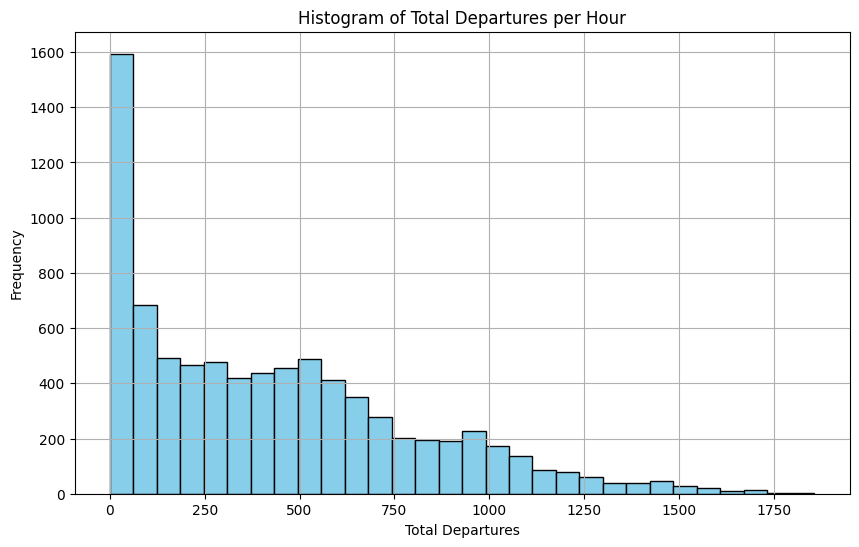

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(total_departures_per_hour['total_departures'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Departures per Hour')
plt.xlabel('Total Departures')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


                    hour  total_arrivals
0    2023-01-01 00:00:00            70.0
1    2023-01-01 01:00:00           141.0
2    2023-01-01 02:00:00           152.0
3    2023-01-01 03:00:00           102.0
4    2023-01-01 04:00:00            16.0
...                  ...             ...
8092 2024-01-01 01:00:00             3.0
8093 2024-01-01 02:00:00             3.0
8094 2024-01-01 06:00:00             1.0
8095 2024-01-01 12:00:00             2.0
8096 2024-01-01 15:00:00             2.0

[8097 rows x 2 columns]


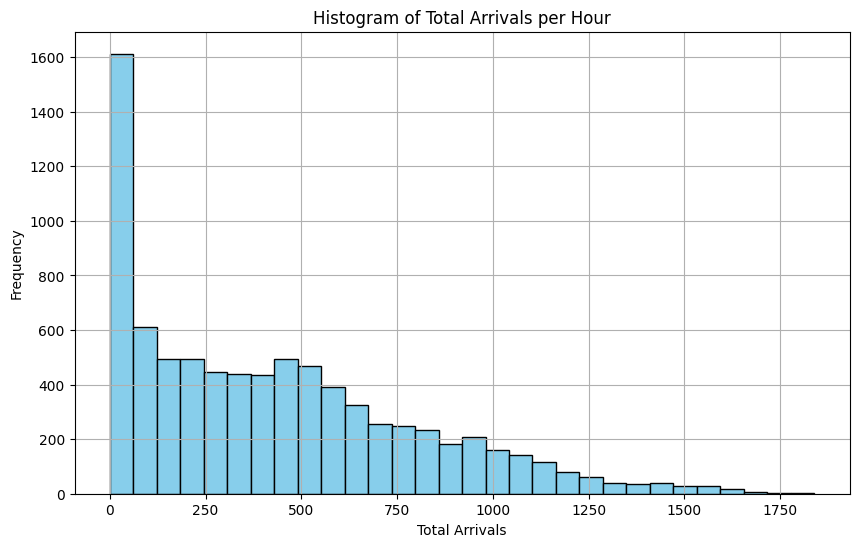

In [83]:
total_arrivals_per_hour = station_hourly.groupby('hour')['arrivals'].sum().reset_index(name='total_arrivals')
print(total_arrivals_per_hour)

plt.figure(figsize=(10, 6))
plt.hist(total_arrivals_per_hour['total_arrivals'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Arrivals per Hour')
plt.xlabel('Total Arrivals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Match Deltas, Station Info and Weather Infos

In [2]:
import pandas as pd
station_hourly_deltas = pd.read_parquet("data/processed/station_hourly_deltas.parquet")
hourly_weather = pd.read_parquet("data/processed/weather_hourly_all_locations_2023.parquet")

In [3]:
station_data = pd.read_csv("data/raw/Capital_Bikeshare_Locations.csv")

In [4]:
station_data.head()

,X,Y,NAME,STATION_TYPE,STATION_ID,STATION_STATUS,LAST_REPORTED,NUM_DOCKS_AVAILABLE,NUM_DOCKS_DISABLED,NUM_BIKES_AVAILABLE,...,EIGHTD_HAS_KEY_DISPENSER,CAPACITY,RENTAL_METHODS,REGION_ID,REGION_NAME,GIS_ID,LATITUDE,LONGITUDE,GIS_LAST_MOD_DTTM,OBJECTID
0,-8.574519e+06,4.707702e+06,10th & K St NW,classic,08251d5a-1f3f-11e7-bf6b-3863bb334450,NaN,2025/02/26 19:46:19+00,6,0,15,...,NO,23,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.902400,-77.026220,2025/02/26 19:47:29+00,245787994
1,-8.573394e+06,4.706693e+06,4th & D St NW / Judiciary Square,classic,0824cb9b-1f3f-11e7-bf6b-3863bb334450,NaN,2025/02/26 19:46:20+00,2,0,13,...,NO,15,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.895344,-77.016106,2025/02/26 19:47:29+00,245787995
2,-8.571084e+06,4.705096e+06,Eastern Market Metro,classic,1996328198078007666,NaN,2025/02/26 19:46:20+00,25,0,6,...,NO,32,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.884181,-76.995358,2025/02/26 19:47:29+00,245787996
3,-8.575188e+06,4.711443e+06,14th & Irving St NW,classic,082631cd-1f3f-11e7-bf6b-3863bb334450,NaN,2025/02/26 19:46:20+00,6,0,10,...,NO,15,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.928552,-77.032224,2025/02/26 19:47:29+00,245787997
4,-8.569321e+06,4.712070e+06,18th & Monroe St NE,classic,0826547e-1f3f-11e7-bf6b-3863bb334450,NaN,2025/02/26 19:46:21+00,3,0,15,...,NO,19,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.932930,-76.979517,2025/02/26 19:47:29+00,245787998


In [5]:
hourly_weather["date"] = pd.to_datetime(hourly_weather["date"], utc=True)
station_hourly_deltas["hour"] = pd.to_datetime(station_hourly_deltas["hour"],utc=True)

In [6]:
merged_df = pd.merge(hourly_weather, station_data[['LATITUDE', 'LONGITUDE', 'NAME']],
                     left_on=['latitude', 'longitude'], right_on=['LATITUDE', 'LONGITUDE'], how='inner')

In [7]:
station_weather_data = pd.merge(station_hourly_deltas, merged_df,
                                left_on=["station_name", "hour"],
                                right_on=["NAME", "date"],
                                # important to left join here as we do not have weather data for the nights
                                # inner join would thus throw away 400 hours of activity at night time
                                how="left")


In [ ]:
station_weather_data

Index(['station_name', 'hour', 'departures', 'arrivals', 'date',
       'temperature_2m', 'weather_code', 'rain', 'precipitation', 'snowfall',
       'cloud_cover', 'wind_gusts_10m', 'wind_speed_10m', 'location_id',
       'latitude', 'longitude', 'sunrise', 'sunset', 'LATITUDE', 'LONGITUDE',
       'NAME'],
      dtype='object')

In [8]:
combined_data_final = pd.merge(station_weather_data, station_data, left_on=["station_name"],
                                right_on=["NAME"], how="inner")

In [19]:
combined_data_final.columns

Index(['station_name', 'hour', 'departures', 'arrivals', 'temperature_2m',
       'weather_code', 'rain', 'precipitation', 'snowfall', 'cloud_cover',
       'wind_gusts_10m', 'wind_speed_10m', 'sunrise', 'sunset',
       'num_docks_available', 'num_bikes_available', 'num_ebikes_available',
       'has_kiosk', 'capacity', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
combined_data_final = combined_data_final.drop(columns=['date', "location_id", "latitude", "longitude", "LATITUDE_x", "LONGITUDE_x", 'NAME_x', "X", "Y", "NAME_y", "STATION_ID"])
combined_data_final = combined_data_final.drop(columns=["GIS_LAST_MOD_DTTM", "OBJECTID", "STATION_STATUS", "EIGHTD_HAS_KEY_DISPENSER", "LAST_REPORTED","NUM_DOCKS_DISABLED", "NUM_BIKES_DISABLED", "IOS", "ANDROID", "ELECTRIC_BIKE_SURCHARGE_WAIVER"])

In [14]:
combined_data_final = combined_data_final.drop(columns=['STATION_TYPE', 'IS_INSTALLED', 'IS_RETURNING', 'IS_RENTING', 'RENTAL_METHODS', 'REGION_ID', 'REGION_NAME', 'GIS_ID'])

In [16]:
combined_data_final.columns = combined_data_final.columns.str.lower()

In [18]:
combined_data_final = combined_data_final.rename(columns={
    'latitude_y': 'latitude',
    'longitude_y': 'longitude'
})


In [20]:
combined_data_final.to_parquet("data/final/demand_per_station_per_hour_with_weather.parquet", compression="brotli")